In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as pt
import seaborn as sns
from datetime import *
import warnings
warnings.filterwarnings('ignore')
df=pd.read_csv('startup data.csv')
df

,Unnamed: 0,state_code,latitude,longitude,zip_code,id,city,Unnamed: 6,name,labels,...,object_id,has_VC,has_angel,has_roundA,has_roundB,has_roundC,has_roundD,avg_participants,is_top500,status
0,1005,CA,42.358880,-71.056820,92101,c:6669,San Diego,NaN,Bandsintown,1,...,c:6669,0,1,0,0,0,0,1.0000,0,acquired
1,204,CA,37.238916,-121.973718,95032,c:16283,Los Gatos,NaN,TriCipher,1,...,c:16283,1,0,0,1,1,1,4.7500,1,acquired
2,1001,CA,32.901049,-117.192656,92121,c:65620,San Diego,San Diego CA 92121,Plixi,1,...,c:65620,0,0,1,0,0,0,4.0000,1,acquired
3,738,CA,37.320309,-122.050040,95014,c:42668,Cupertino,Cupertino CA 95014,Solidcore Systems,1,...,c:42668,0,0,0,1,1,1,3.3333,1,acquired
4,1002,CA,37.779281,-122.419236,94105,c:65806,San Francisco,San Francisco CA 94105,Inhale Digital,0,...,c:65806,1,1,0,0,0,0,1.0000,1,closed
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
918,352,CA,37.740594,-122.376471,94107,c:21343,San Francisco,NaN,CoTweet,1,...,c:21343,0,0,1,0,0,0,6.0000,1,acquired
919,721,MA,42.504817,-71.195611,1803,c:41747,Burlington,Burlington MA 1803,Reef Point Systems,0,...,c:41747,1,0,0,1,0,0,2.6667,1,closed
920,557,CA,37.408261,-122.015920,94089,c:31549,Sunnyvale,NaN,Paracor Medical,0,...,c:31549,0,0,0,0,0,1,8.0000,1,closed
921,589,CA,37.556732,-122.288378,94404,c:33198,San Francisco,NaN,Causata,1,...,c:33198,0,0,1,1,0,0,1.0000,1,acquired


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 923 entries, 0 to 922
Data columns (total 49 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                923 non-null    int64  
 1   state_code                923 non-null    object 
 2   latitude                  923 non-null    float64
 3   longitude                 923 non-null    float64
 4   zip_code                  923 non-null    object 
 5   id                        923 non-null    object 
 6   city                      923 non-null    object 
 7   Unnamed: 6                430 non-null    object 
 8   name                      923 non-null    object 
 9   labels                    923 non-null    int64  
 10  founded_at                923 non-null    object 
 11  closed_at                 335 non-null    object 
 12  first_funding_at          923 non-null    object 
 13  last_funding_at           923 non-null    object 
 14  age_first_

In [3]:
df.isna().sum() # as can seen this data have null values in come column

Unnamed: 0                    0
state_code                    0
latitude                      0
longitude                     0
zip_code                      0
id                            0
city                          0
Unnamed: 6                  493
name                          0
labels                        0
founded_at                    0
closed_at                   588
first_funding_at              0
last_funding_at               0
age_first_funding_year        0
age_last_funding_year         0
age_first_milestone_year    152
age_last_milestone_year     152
relationships                 0
funding_rounds                0
funding_total_usd             0
milestones                    0
state_code.1                  1
is_CA                         0
is_NY                         0
is_MA                         0
is_TX                         0
is_otherstate                 0
category_code                 0
is_software                   0
is_web                        0
is_mobil

In [4]:
df.drop(['Unnamed: 6','Unnamed: 0','closed_at'],axis=1,inplace=True) # drop unrelated columns

In [5]:
df.isna().sum()

state_code                    0
latitude                      0
longitude                     0
zip_code                      0
id                            0
city                          0
name                          0
labels                        0
founded_at                    0
first_funding_at              0
last_funding_at               0
age_first_funding_year        0
age_last_funding_year         0
age_first_milestone_year    152
age_last_milestone_year     152
relationships                 0
funding_rounds                0
funding_total_usd             0
milestones                    0
state_code.1                  1
is_CA                         0
is_NY                         0
is_MA                         0
is_TX                         0
is_otherstate                 0
category_code                 0
is_software                   0
is_web                        0
is_mobile                     0
is_enterprise                 0
is_advertising                0
is_games

In [6]:
mean1=df['age_first_milestone_year'].mean()
mean2=df['age_last_milestone_year'].mean() # to fill nullvalues we taake mean 

In [7]:
df['age_first_milestone_year'].fillna(mean1,inplace=True)
df['age_last_milestone_year'].fillna(mean2,inplace=True)

In [8]:
df.isna().sum()

state_code                  0
latitude                    0
longitude                   0
zip_code                    0
id                          0
city                        0
name                        0
labels                      0
founded_at                  0
first_funding_at            0
last_funding_at             0
age_first_funding_year      0
age_last_funding_year       0
age_first_milestone_year    0
age_last_milestone_year     0
relationships               0
funding_rounds              0
funding_total_usd           0
milestones                  0
state_code.1                1
is_CA                       0
is_NY                       0
is_MA                       0
is_TX                       0
is_otherstate               0
category_code               0
is_software                 0
is_web                      0
is_mobile                   0
is_enterprise               0
is_advertising              0
is_gamesvideo               0
is_ecommerce                0
is_biotech

In [9]:
df.dropna(inplace=True)

In [10]:
df.isna().sum()

state_code                  0
latitude                    0
longitude                   0
zip_code                    0
id                          0
city                        0
name                        0
labels                      0
founded_at                  0
first_funding_at            0
last_funding_at             0
age_first_funding_year      0
age_last_funding_year       0
age_first_milestone_year    0
age_last_milestone_year     0
relationships               0
funding_rounds              0
funding_total_usd           0
milestones                  0
state_code.1                0
is_CA                       0
is_NY                       0
is_MA                       0
is_TX                       0
is_otherstate               0
category_code               0
is_software                 0
is_web                      0
is_mobile                   0
is_enterprise               0
is_advertising              0
is_gamesvideo               0
is_ecommerce                0
is_biotech

<AxesSubplot:ylabel='state_code'>

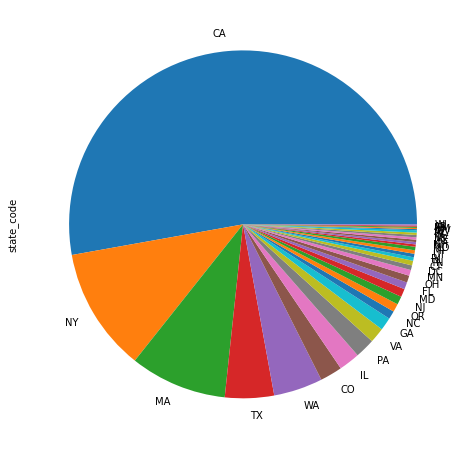

In [11]:
pt.figure(figsize=(8,8)) #max num of startup are from CA  followed by NY
df['state_code'].value_counts().plot(kind='pie')

In [12]:
df['city'].value_counts()  # most of the startup are from San Francisco city = 128 and then followed by New York = 91

San Francisco     128
New York           91
Mountain View      47
Palo Alto          35
Santa Clara        27
                 ... 
Solana Beach        1
Bala Cynwyd         1
Evanston            1
West Hollywood      1
Middleton           1
Name: city, Length: 221, dtype: int64

In [13]:
df.head()

,state_code,latitude,longitude,zip_code,id,city,name,labels,founded_at,first_funding_at,...,object_id,has_VC,has_angel,has_roundA,has_roundB,has_roundC,has_roundD,avg_participants,is_top500,status
0,CA,42.358880,-71.056820,92101,c:6669,San Diego,Bandsintown,1,1/1/2007,4/1/2009,...,c:6669,0,1,0,0,0,0,1.0000,0,acquired
1,CA,37.238916,-121.973718,95032,c:16283,Los Gatos,TriCipher,1,1/1/2000,2/14/2005,...,c:16283,1,0,0,1,1,1,4.7500,1,acquired
2,CA,32.901049,-117.192656,92121,c:65620,San Diego,Plixi,1,3/18/2009,3/30/2010,...,c:65620,0,0,1,0,0,0,4.0000,1,acquired
3,CA,37.320309,-122.050040,95014,c:42668,Cupertino,Solidcore Systems,1,1/1/2002,2/17/2005,...,c:42668,0,0,0,1,1,1,3.3333,1,acquired
4,CA,37.779281,-122.419236,94105,c:65806,San Francisco,Inhale Digital,0,8/1/2010,8/1/2010,...,c:65806,1,1,0,0,0,0,1.0000,1,closed


In [14]:
df['status'].value_counts() 

acquired    597
closed      325
Name: status, dtype: int64

In [15]:
df['founded_at'] = pd.to_datetime(df['founded_at'])
df['founded']=df['founded_at'].dt.year
df.drop('founded_at',axis=1,inplace=True)    # convert date into year

In [16]:
df['first_funding_at'] = pd.to_datetime(df['first_funding_at'])
df['first_funding']=df['first_funding_at'].dt.year
df.drop('first_funding_at',axis=1,inplace=True)

In [17]:
df['last_funding_at'] = pd.to_datetime(df['last_funding_at'])
df['last_funding']=df['last_funding_at'].dt.year
df.drop('last_funding_at',axis=1,inplace=True)

In [18]:
df.drop(['id','zip_code','longitude','latitude','state_code'],axis=1,inplace=True)

In [19]:
df

,city,name,labels,age_first_funding_year,age_last_funding_year,age_first_milestone_year,age_last_milestone_year,relationships,funding_rounds,funding_total_usd,...,has_roundA,has_roundB,has_roundC,has_roundD,avg_participants,is_top500,status,founded,first_funding,last_funding
0,San Diego,Bandsintown,1,2.2493,3.0027,4.6685,6.7041,3,3,375000,...,0,0,0,0,1.0000,0,acquired,2007,2009,2010
1,Los Gatos,TriCipher,1,5.1260,9.9973,7.0055,7.0055,9,4,40100000,...,0,1,1,1,4.7500,1,acquired,2000,2005,2009
2,San Diego,Plixi,1,1.0329,1.0329,1.4575,2.2055,5,1,2600000,...,1,0,0,0,4.0000,1,acquired,2009,2010,2010
3,Cupertino,Solidcore Systems,1,3.1315,5.3151,6.0027,6.0027,5,3,40000000,...,0,1,1,1,3.3333,1,acquired,2002,2005,2007
4,San Francisco,Inhale Digital,0,0.0000,1.6685,0.0384,0.0384,2,2,1300000,...,0,0,0,0,1.0000,1,closed,2010,2010,2012
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
918,San Francisco,CoTweet,1,0.5178,0.5178,0.5808,4.5260,9,1,1100000,...,1,0,0,0,6.0000,1,acquired,2009,2009,2009
919,Burlington,Reef Point Systems,0,7.2521,9.2274,6.0027,6.0027,1,3,52000000,...,0,1,0,0,2.6667,1,closed,1998,2005,2007
920,Sunnyvale,Paracor Medical,0,8.4959,8.4959,9.0055,9.0055,5,1,44000000,...,0,0,0,1,8.0000,1,closed,1999,2007,2007
921,San Francisco,Causata,1,0.7589,2.8329,0.7589,3.8356,12,2,15500000,...,1,1,0,0,1.0000,1,acquired,2009,2009,2011


<AxesSubplot:ylabel='founded'>

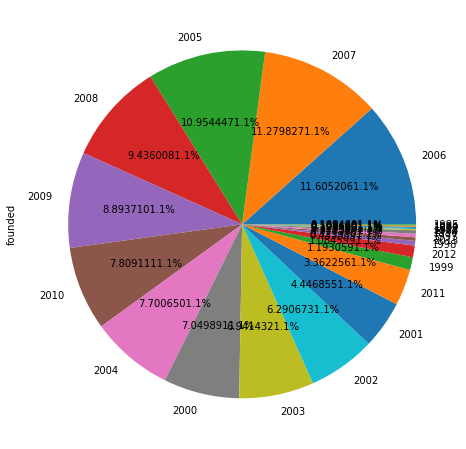

In [20]:
pt.figure(figsize=(8,8))
df['founded'].value_counts().plot(kind='pie',autopct='%f1.1%%') 

<AxesSubplot:xlabel='funding_total_usd', ylabel='count'>

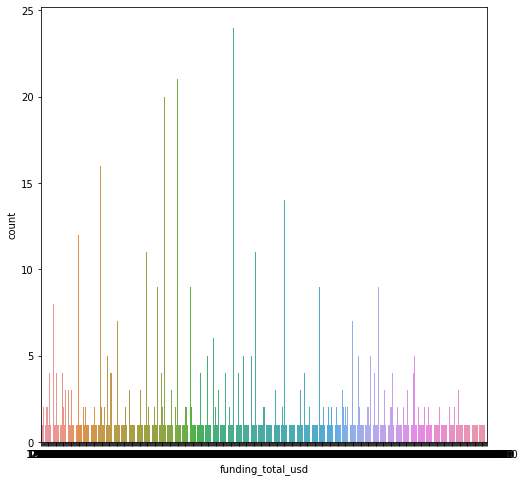

In [21]:
pt.figure(figsize=(8,8))
sns.countplot(data=df,x='funding_total_usd')

In [22]:
df_cat=df.select_dtypes(object)
df_num=df.select_dtypes(int,float) #separate categorical data and numric data

In [23]:
from sklearn.preprocessing import LabelEncoder
LE=LabelEncoder()
for i in df_cat:
    df_cat[i]=LE.fit_transform(df_cat[i])    #convert object into int

In [24]:
df1=pd.concat([df_num,df_cat],axis=1)

In [25]:
#import pandas_profiling as pp
#pp.ProfileReport(df1)

In [26]:
df1.drop(['relationships','object_id','labels','is_CA','is_NY','is_MA','is_software'],axis=1,inplace=True)

In [27]:
df1.corr() #to check corelation of columns with target 

,funding_rounds,funding_total_usd,milestones,is_TX,is_otherstate,is_web,is_mobile,is_enterprise,is_advertising,is_gamesvideo,...,has_roundD,is_top500,founded,first_funding,last_funding,city,name,state_code.1,category_code,status
funding_rounds,1.000000,0.115813,0.230899,-0.018975,-0.062935,-0.091987,0.104221,0.078774,-0.000932,-0.004011,...,0.323567,0.259503,-0.094486,-0.302138,0.377639,-0.077755,0.032392,-0.043011,-0.093230,-0.205931
funding_total_usd,0.115813,1.000000,0.012003,-0.003979,0.057796,-0.030410,0.107407,-0.010933,-0.015001,-0.011820,...,0.045163,0.048963,-0.059253,-0.033173,0.072560,-0.027342,-0.043519,0.051276,-0.023887,-0.040274
milestones,0.230899,0.012003,1.000000,-0.032524,-0.123162,0.176707,0.128161,0.084302,0.065424,0.072432,...,0.021284,0.170822,0.200032,0.008761,0.183530,0.012341,0.044502,-0.017830,-0.003715,-0.331465
is_TX,-0.018975,-0.003979,-0.032524,1.000000,-0.116449,-0.022347,-0.029710,0.051524,-0.058658,-0.030863,...,-0.038024,-0.026241,-0.041073,-0.027210,-0.047431,-0.300234,-0.020183,0.381134,0.032285,0.045676
is_otherstate,-0.062935,0.057796,-0.123162,-0.116449,1.000000,-0.027791,0.014195,0.056592,-0.028357,-0.073683,...,-0.055410,-0.153306,-0.025425,0.054533,-0.003831,-0.148622,-0.014023,0.437003,0.010701,0.170044
is_web,-0.091987,-0.030410,0.176707,-0.022347,-0.027791,1.000000,-0.131702,-0.126153,-0.115515,-0.105180,...,-0.083423,-0.117923,0.153644,0.065700,-0.040422,0.070457,0.036197,0.003260,0.542761,0.001506
is_mobile,0.104221,0.107407,0.128161,-0.029710,0.014195,-0.131702,1.000000,-0.089765,-0.082195,-0.074841,...,0.027373,0.040231,0.041463,0.000651,0.085781,-0.029414,0.048162,0.027531,-0.037323,-0.006871
is_enterprise,0.078774,-0.010933,0.084302,0.051524,0.056592,-0.126153,-0.089765,1.000000,-0.078733,-0.071689,...,0.022996,0.009556,0.083938,0.084490,0.149822,-0.051090,0.010524,0.032657,-0.289303,-0.073419
is_advertising,-0.000932,-0.015001,0.065424,-0.058658,-0.028357,-0.115515,-0.082195,-0.078733,1.000000,-0.065643,...,-0.060494,-0.045894,0.034611,-0.012312,-0.008137,0.076455,-0.019305,-0.012696,-0.450643,-0.044006
is_gamesvideo,-0.004011,-0.011820,0.072432,-0.030863,-0.073683,-0.105180,-0.074841,-0.071689,-0.065643,1.000000,...,-0.002960,-0.000882,0.052188,0.010743,-0.022610,0.010092,0.018220,0.001279,-0.177786,0.026278


In [28]:
x=df1.iloc[:,:-1]
y=df1['status'] #separate x & y

In [29]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.3,random_state=1)

In [30]:
from sklearn.linear_model import LogisticRegression  #building Model
lr=LogisticRegression()
lr.fit(xtrain,ytrain)
ypred=lr.predict(xtest)

In [31]:
from sklearn.metrics import classification_report,accuracy_score
print(classification_report(ytest,ypred))   #cheacking accuracy

              precision    recall  f1-score   support

           0       0.62      1.00      0.77       173
           1       0.00      0.00      0.00       104

    accuracy                           0.62       277
   macro avg       0.31      0.50      0.38       277
weighted avg       0.39      0.62      0.48       277



In [32]:
from sklearn.svm import SVC  #import more models
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [33]:
svc=SVC()
knn=KNeighborsClassifier()
dt=DecisionTreeClassifier()
rf=RandomForestClassifier()

In [34]:
def random(model):
    model.fit(xtrain,ytrain)
    ypred=model.predict(xtest)
    print(classification_report(ytest,ypred))

In [35]:
random(svc)

              precision    recall  f1-score   support

           0       0.62      1.00      0.77       173
           1       0.00      0.00      0.00       104

    accuracy                           0.62       277
   macro avg       0.31      0.50      0.38       277
weighted avg       0.39      0.62      0.48       277



In [36]:
random(knn)

              precision    recall  f1-score   support

           0       0.66      0.80      0.72       173
           1       0.49      0.32      0.38       104

    accuracy                           0.62       277
   macro avg       0.57      0.56      0.55       277
weighted avg       0.59      0.62      0.60       277



In [37]:
random(dt)

              precision    recall  f1-score   support

           0       0.71      0.72      0.72       173
           1       0.53      0.52      0.52       104

    accuracy                           0.65       277
   macro avg       0.62      0.62      0.62       277
weighted avg       0.64      0.65      0.65       277



In [38]:
random(rf)

              precision    recall  f1-score   support

           0       0.75      0.91      0.82       173
           1       0.77      0.49      0.60       104

    accuracy                           0.75       277
   macro avg       0.76      0.70      0.71       277
weighted avg       0.76      0.75      0.74       277



In [39]:
#using hypertuner
rf1=RandomForestClassifier(criterion='gini',min_samples_leaf=1)

In [40]:
random(rf1)

              precision    recall  f1-score   support

           0       0.75      0.92      0.83       173
           1       0.78      0.49      0.60       104

    accuracy                           0.76       277
   macro avg       0.77      0.70      0.71       277
weighted avg       0.76      0.76      0.74       277



In [41]:
for i in range(1,30):
    rf2=RandomForestClassifier(min_samples_leaf=i)
    rf2.fit(xtrain,ytrain)
    ypred=rf2.predict(xtest)
    print(i,accuracy_score(ytest,ypred))

1 0.7545126353790613
2 0.7689530685920578
3 0.7653429602888087
4 0.7436823104693141
5 0.7472924187725631
6 0.7472924187725631
7 0.7509025270758123
8 0.7472924187725631
9 0.7364620938628159
10 0.7436823104693141
11 0.7292418772563177
12 0.7328519855595668
13 0.7256317689530686
14 0.740072202166065
15 0.7256317689530686
16 0.7328519855595668
17 0.7256317689530686
18 0.7328519855595668
19 0.740072202166065
20 0.7220216606498195
21 0.7111913357400722
22 0.7184115523465704
23 0.7148014440433214
24 0.7292418772563177
25 0.7184115523465704
26 0.7292418772563177
27 0.7148014440433214
28 0.7111913357400722
29 0.7111913357400722


In [48]:
#in RF we get highest accuracy
rf3=RandomForestClassifier(criterion='gini',min_samples_leaf=1)
random(rf3)

              precision    recall  f1-score   support

           0       0.76      0.92      0.83       173
           1       0.79      0.51      0.62       104

    accuracy                           0.77       277
   macro avg       0.77      0.71      0.73       277
weighted avg       0.77      0.77      0.75       277



In [49]:
df1.columns

Index(['funding_rounds', 'funding_total_usd', 'milestones', 'is_TX',
       'is_otherstate', 'is_web', 'is_mobile', 'is_enterprise',
       'is_advertising', 'is_gamesvideo', 'is_ecommerce', 'is_biotech',
       'is_consulting', 'is_othercategory', 'has_VC', 'has_angel',
       'has_roundA', 'has_roundB', 'has_roundC', 'has_roundD', 'is_top500',
       'founded', 'first_funding', 'last_funding', 'city', 'name',
       'state_code.1', 'category_code', 'status'],
      dtype='object')

In [50]:
from sklearn.model_selection import cross_val_score
cross_val_score(rf3,x,y).mean()


0.7711515863689776